In [1]:
#to solve the first part of the project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('avocado.csv',parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [6]:
# data types: float64(9), int64(2), object(3)

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
# there are some unnamed/undefined columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [10]:
# 'region','type' and 'date' columns are in object format

In [11]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
# outliers are present cause the gap between 75% and max is more in some features--

In [13]:
df['Date'].value_counts()

2015-05-24    108
2015-09-13    108
2016-08-07    108
2015-03-08    108
2017-07-02    108
             ... 
2015-03-22    108
2017-07-16    108
2017-06-25    107
2015-12-06    107
2017-06-18    107
Name: Date, Length: 169, dtype: int64

In [14]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [15]:
df['region'].value_counts()

SanDiego               338
SouthCarolina          338
Roanoke                338
Houston                338
Philadelphia           338
CincinnatiDayton       338
Spokane                338
HartfordSpringfield    338
Louisville             338
Seattle                338
Orlando                338
Denver                 338
Sacramento             338
Jacksonville           338
LasVegas               338
NorthernNewEngland     338
NewYork                338
Columbus               338
LosAngeles             338
SouthCentral           338
StLouis                338
TotalUS                338
Nashville              338
Boise                  338
Tampa                  338
Detroit                338
Pittsburgh             338
BuffaloRochester       338
Plains                 338
GrandRapids            338
RaleighGreensboro      338
Boston                 338
Northeast              338
Indianapolis           338
Atlanta                338
DallasFtWorth          338
Midsouth               338
N

In [16]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [17]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [18]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [19]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

so theres no missing values

In [20]:
#check for duplicated data
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


We know that there's no missing or duplicate values

In [21]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


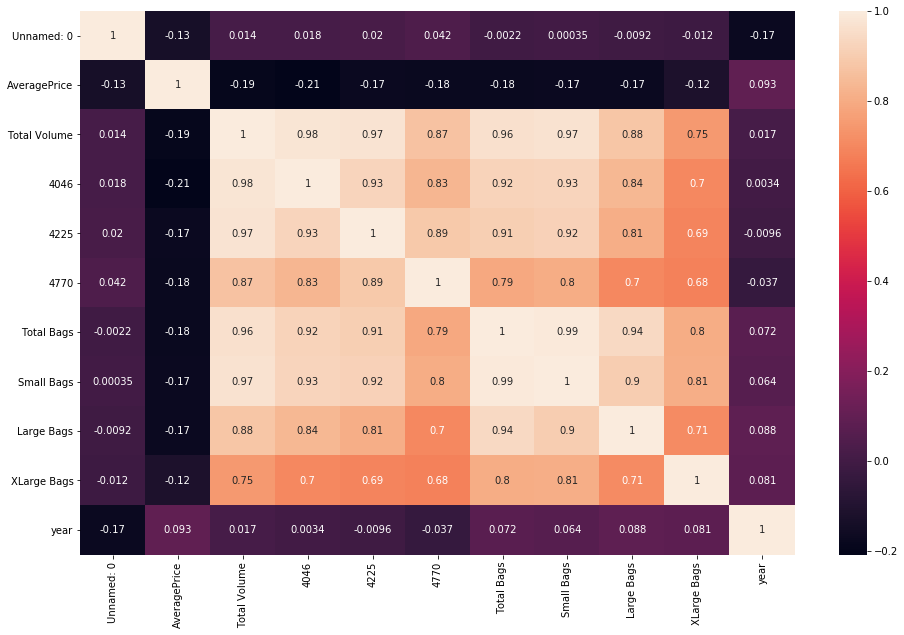

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

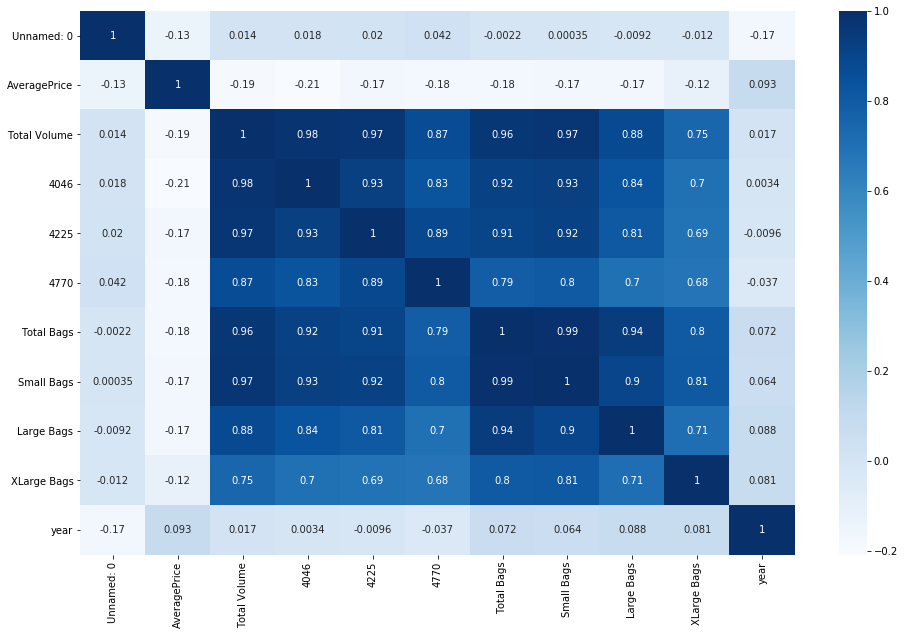

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [24]:
df.groupby("region")["AveragePrice"].mean()

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

In [25]:
df.groupby(["type", "region"])["AveragePrice"].mean()

type          region             
conventional  Albany                 1.348757
              Atlanta                1.068817
              BaltimoreWashington    1.344201
              Boise                  1.076036
              Boston                 1.304379
                                       ...   
organic       Syracuse               1.653728
              Tampa                  1.616095
              TotalUS                1.546036
              West                   1.559349
              WestTexNewMexico       1.688855
Name: AveragePrice, Length: 108, dtype: float64

In [26]:
df.groupby("type")["AveragePrice"].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

Text(0.5, 1.0, 'Average Price of Avocado According to Type')

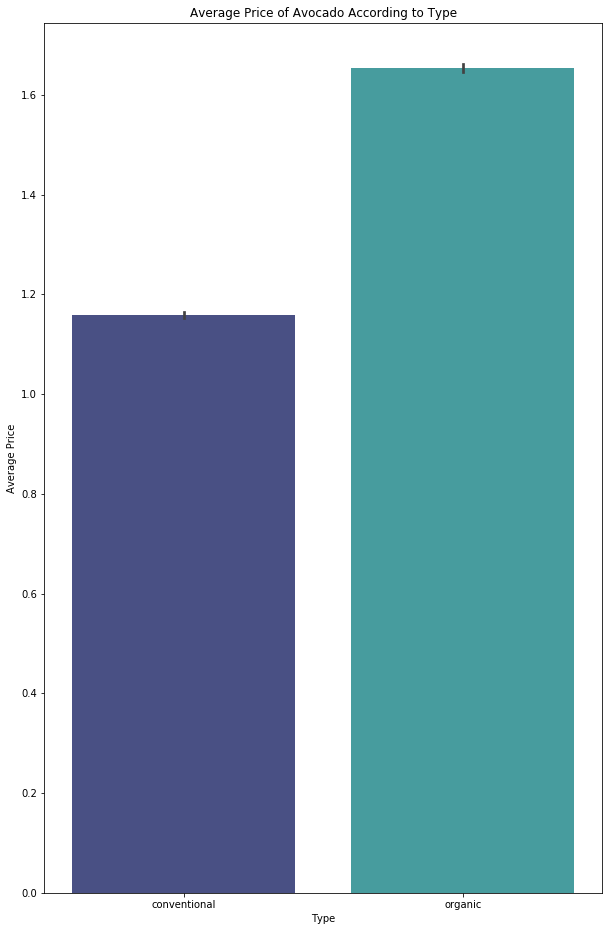

In [27]:

plt.figure(figsize=(10,16))
sns.barplot(x=df.type, y=df.AveragePrice, palette="mako")

plt.xlabel("Type")
plt.ylabel("Average Price")
plt.title("Average Price of Avocado According to Type")

In [28]:
# so averageprice of organic type is higher

Text(0.5, 1.0, 'Average Price According to Years')

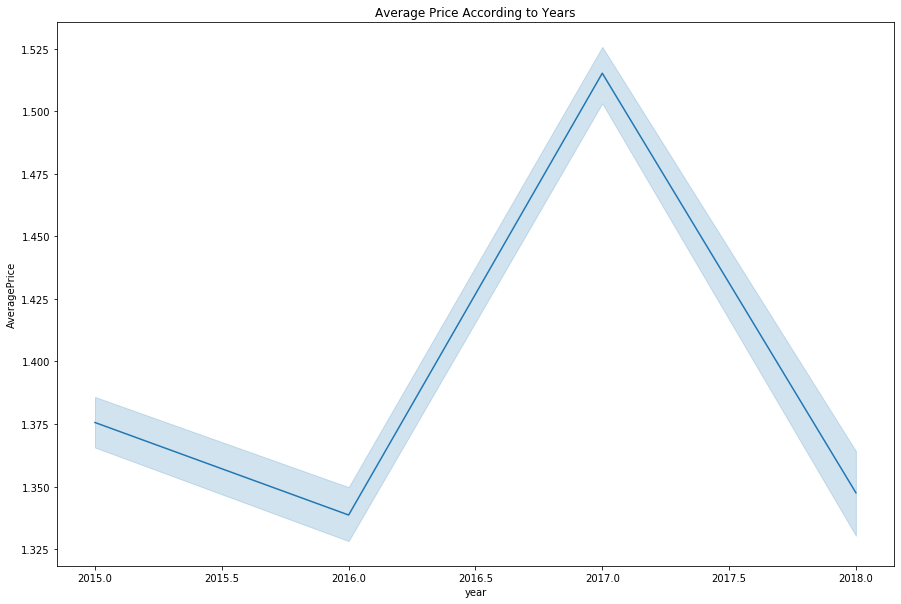

In [29]:
plt.figure(figsize=(15,10))
sns.lineplot(x="year", y="AveragePrice",data=df)
plt.title("Average Price According to Years")

In [30]:
#2017 is the year with highest average prices

Text(0.5, 1.0, 'Average Price According to Date')

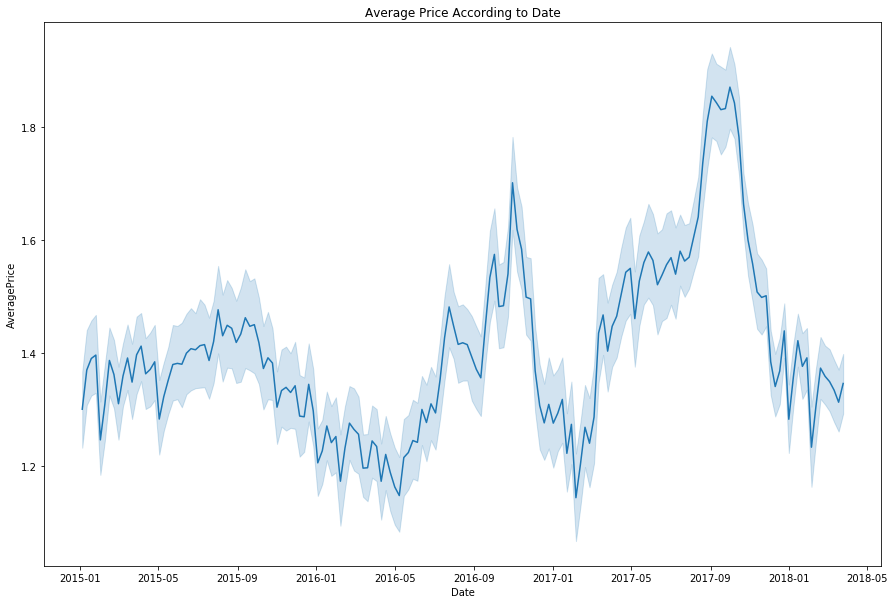

In [31]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Date", y="AveragePrice",data=df)
plt.title("Average Price According to Date")

In [32]:
#plt.figure(figsize=(14,10))
#sns.scatterplot(x='Total Volume', y = 'AveragePrice', data= df)

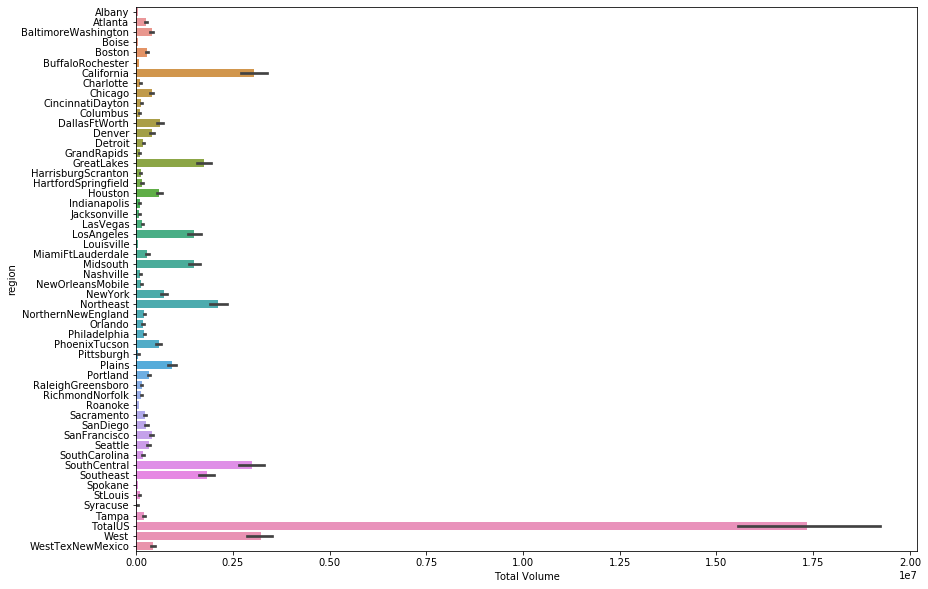

In [33]:
plt.figure(figsize=(14,10))
sns.barplot(x='Total Volume', y = 'region',data= df)

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

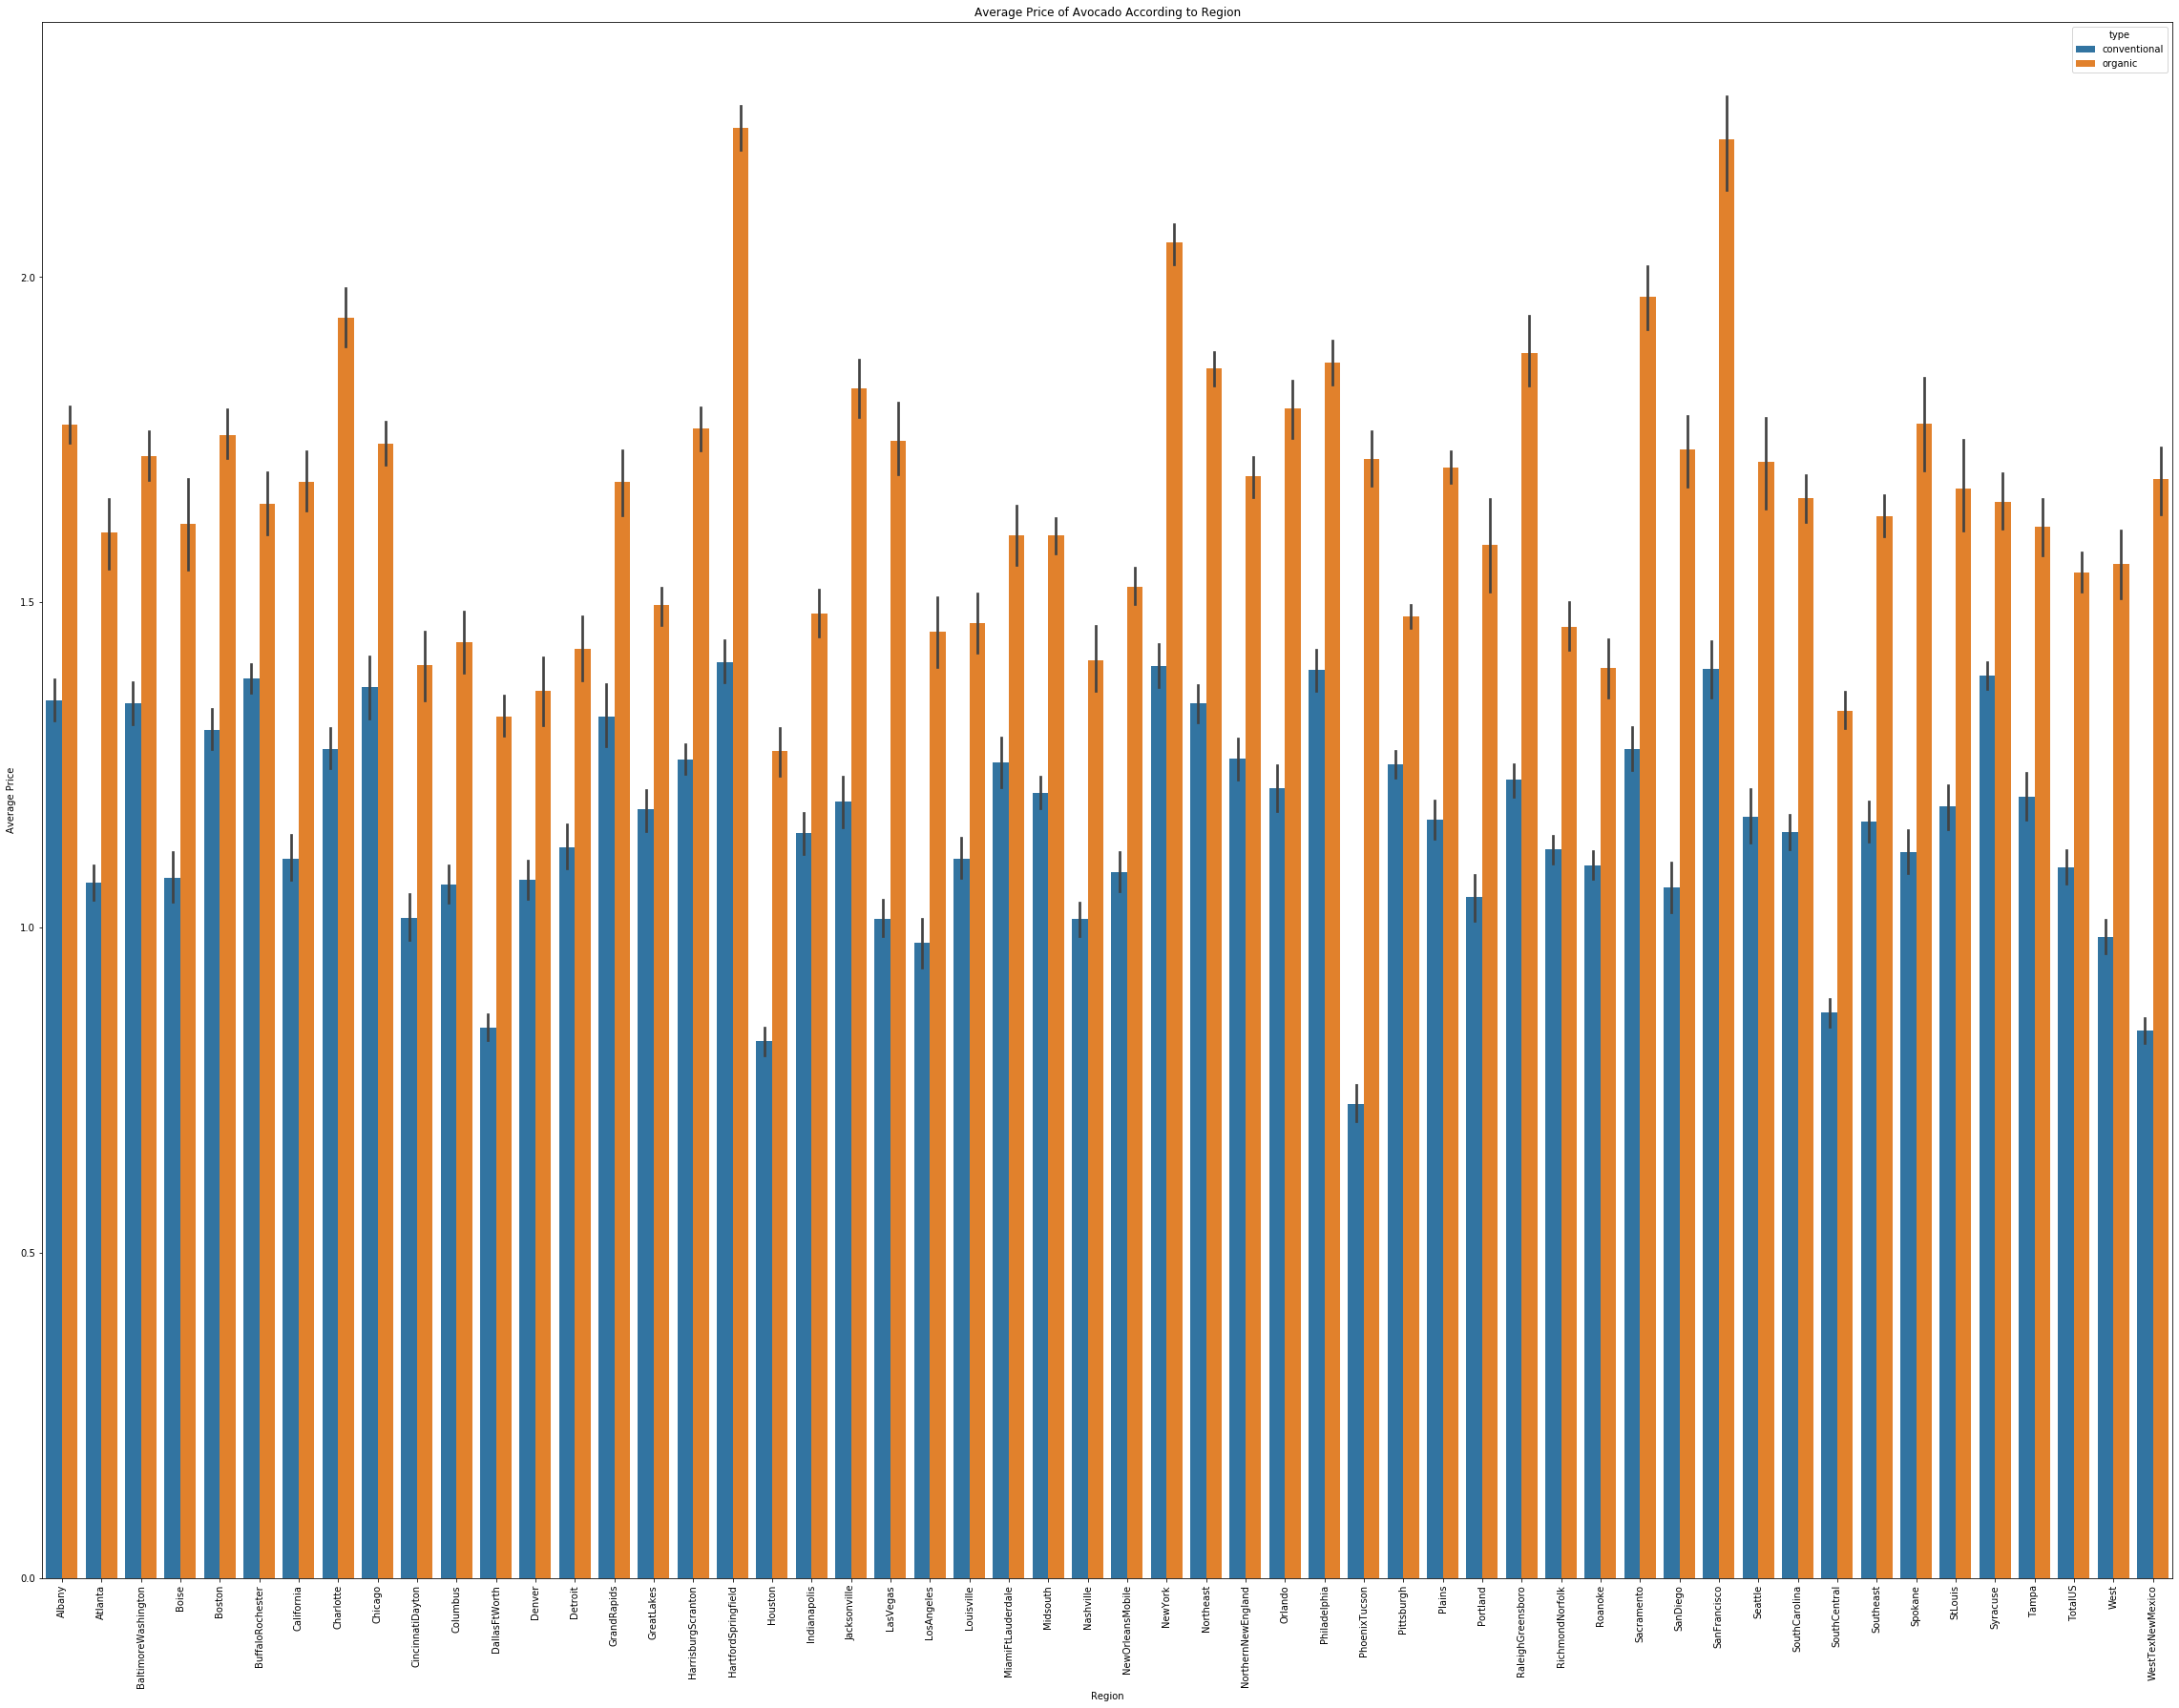

In [34]:
plt.figure(figsize=(40,30))
sns.barplot(x='region', y = 'AveragePrice', hue= 'type', data= df)


sns.color_palette("rocket")

plt.xticks(rotation=90)#this helps alot
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')


In [35]:
#label encode region
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])


In [36]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667,-0.000489
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.011716
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,0.174176
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.192073
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.145726
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.095252
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,0.175256
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.164702
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.198768
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.082281


In [37]:
#Lets drop useless columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.082281
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.000055


In [39]:
#dfdates=pd.DataFrame()
#dfdates['Date']=pd.to_datetime(df['Date'])
#dfdates['Month']=df['Date'].apply(lambda x:x.month)
#dfdates['Day']=df['Date'].apply(lambda x:x.day)
#dfdates
#too many columns lets change the original data

In [40]:
#df['Date']=pd.to_datetime(df['Date'])
#df['Month']=df['Date'].apply(lambda x:x.month)
#df['Day']=df['Date'].apply(lambda x:x.day)

In [41]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


In [42]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
region           0.000030
dtype: float64

In [43]:
#Lets treat the skewness
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

In [44]:
df.skew()

AveragePrice    0.070540
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
year            0.215339
region          0.000030
dtype: float64

In [45]:
#skewness is removed

In [46]:
#Checking outliers

In [47]:
#Lets drop useless column
df1=df.drop(columns=["Date"])

In [48]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.099724,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,conventional,2015,0
1,2015-12-20,1.105209,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,conventional,2015,0
2,2015-12-13,0.976100,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,conventional,2015,0
3,2015-12-06,1.025986,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,conventional,2015,0
4,2015-11-29,1.085767,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.176872,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,organic,2018,53
18245,2018-01-28,1.195819,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,organic,2018,53
18246,2018-01-21,1.232009,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,organic,2018,53
18247,2018-01-14,1.245047,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,organic,2018,53


In [49]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.099724,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,conventional,2015,0
1,1.105209,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,conventional,2015,0
2,0.976100,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,conventional,2015,0
3,1.025986,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,conventional,2015,0
4,1.085767,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.176872,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,organic,2018,53
18245,1.195819,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,organic,2018,53
18246,1.232009,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,organic,2018,53
18247,1.245047,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,organic,2018,53


In [50]:
#label encode region
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['type'] = le.fit_transform(df1['type'])

In [51]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.099724,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,2015,0
1,1.105209,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,2015,0
2,0.976100,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,2015,0
3,1.025986,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,2015,0
4,1.085767,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.176872,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1,2018,53
18245,1.195819,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1,2018,53
18246,1.232009,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1,2018,53
18247,1.245047,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1,2018,53


In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z
threshold=3
print(np.where(z>3))

(array([  313,   326,   327, ..., 17247, 17249, 17428], dtype=int64), array([4, 4, 4, ..., 0, 0, 0], dtype=int64))


In [53]:
dfnew=df1[(z<3).all(axis=1)]

In [54]:
df1.shape,dfnew.shape

((18249, 12), (17319, 12))

In [55]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.501271,-0.520517,-0.423702,-0.446639,-0.477502,-0.444342,-0.443539,-0.306710,0.092007,-0.017360
Total Volume,-0.501271,1.000000,0.936579,0.959318,0.855680,0.968592,0.960888,0.813446,0.736414,0.049149,0.156074
4046,-0.520517,0.936579,1.000000,0.826342,0.790790,0.889873,0.880089,0.769275,0.693262,0.012694,0.218500
4225,-0.423702,0.959318,0.826342,1.000000,0.845655,0.905044,0.904775,0.735340,0.691925,-0.004311,0.108452
4770,-0.446639,0.855680,0.790790,0.845655,1.000000,0.803904,0.809414,0.639581,0.729334,-0.062421,0.056363
Total Bags,-0.477502,0.968592,0.889873,0.905044,0.803904,1.000000,0.982716,0.858497,0.743290,0.158680,0.165688
Small Bags,-0.444342,0.960888,0.880089,0.904775,0.809414,0.982716,1.000000,0.764841,0.742418,0.143385,0.151884
Large Bags,-0.443539,0.813446,0.769275,0.735340,0.639581,0.858497,0.764841,1.000000,0.592155,0.166212,0.199268
XLarge Bags,-0.306710,0.736414,0.693262,0.691925,0.729334,0.743290,0.742418,0.592155,1.000000,0.151598,0.036732
year,0.092007,0.049149,0.012694,-0.004311,-0.062421,0.158680,0.143385,0.166212,0.151598,1.000000,-0.000055


In [56]:
dfclass=pd.get_dummies(dfnew,drop_first=True)

In [57]:
dfclass

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.099724,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,2015,0
1,1.105209,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,2015,0
2,0.976100,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,2015,0
3,1.025986,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,2015,0
4,1.085767,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.176872,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1,2018,53
18245,1.195819,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1,2018,53
18246,1.232009,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1,2018,53
18247,1.245047,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1,2018,53


In [58]:
dfregr=pd.get_dummies(dfnew,drop_first=True)

In [59]:
dfregr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.099724,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,2015,0
1,1.105209,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,2015,0
2,0.976100,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,2015,0
3,1.025986,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,2015,0
4,1.085767,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.176872,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1,2018,53
18245,1.195819,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1,2018,53
18246,1.232009,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1,2018,53
18247,1.245047,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1,2018,53


In [60]:
#this is the final data for calculating average price

# ##Machine learning process

# Regression to calculate average price

In [61]:
x=dfregr.iloc[:,1:14]
y=dfregr['AveragePrice']

In [62]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,2015,0
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,2015,0
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,2015,0
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,2015,0
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1,2018,53
18245,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1,2018,53
18246,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1,2018,53
18247,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1,2018,53


In [63]:
y

0        1.099724
1        1.105209
2        0.976100
3        1.025986
4        1.085767
           ...   
18244    1.176872
18245    1.195819
18246    1.232009
18247    1.245047
18248    1.174460
Name: AveragePrice, Length: 17319, dtype: float64

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x)
newx=scaler.transform(x)
print(newx)

[[-0.31504778 -0.70939586  0.14115013 ... -1.05235311 -1.21042343
  -1.69729137]
 [-0.37472102 -0.75989334  0.04790955 ... -1.05235311 -1.21042343
  -1.69729137]
 [-0.0519505  -0.74145446  0.52052699 ... -1.05235311 -1.21042343
  -1.69729137]
 ...
 [-0.78362647 -0.6914057  -0.79577894 ...  0.95025139  1.9821229
   1.74783629]
 [-0.74461707 -0.65725729 -0.76101689 ...  0.95025139  1.9821229
   1.74783629]
 [-0.72563142 -0.55511477 -0.80266792 ...  0.95025139  1.9821229
   1.74783629]]


In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,newx,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [66]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [67]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,newx,y)

r2 score corresponding to  42  is  0.4998477390819164
r2 score corresponding to  43  is  0.5072706662005029
r2 score corresponding to  44  is  0.5146146313697664
r2 score corresponding to  45  is  0.522377290863248
r2 score corresponding to  46  is  0.5279581025105354
r2 score corresponding to  47  is  0.5179986792534252
r2 score corresponding to  48  is  0.5405549733893908
r2 score corresponding to  49  is  0.5252941818959418
r2 score corresponding to  50  is  0.5209849902650365
r2 score corresponding to  51  is  0.5233281402737808
r2 score corresponding to  52  is  0.5050588946489692
r2 score corresponding to  53  is  0.5180060665082258
r2 score corresponding to  54  is  0.49712565137887565
r2 score corresponding to  55  is  0.5166465337604753
r2 score corresponding to  56  is  0.5030291308408278
r2 score corresponding to  57  is  0.5257758255981684
r2 score corresponding to  58  is  0.5154936034684274
r2 score corresponding to  59  is  0.5030439261154893
r2 score corresponding to  6

In [68]:
#lets check for overfitting or underfitting for this model
print("Linear regression\n\n")
model_evaluation(lnr,x,y)

Linear regression


Mean r2 score for regressor:  0.19744397618809872
standard deviation in r2 score for regressor:  0.10275322652116055
[0.0557415  0.21095703 0.37446551 0.17313555 0.1729203 ]


In [69]:
regr=DecisionTreeRegressor()
final_r_state=maxr2_score(regr,newx,y)

r2 score corresponding to  42  is  0.6980233209637683
r2 score corresponding to  43  is  0.701808936073828
r2 score corresponding to  44  is  0.6959704175671435
r2 score corresponding to  45  is  0.6787977974798411
r2 score corresponding to  46  is  0.711805065361035
r2 score corresponding to  47  is  0.7165104447918627
r2 score corresponding to  48  is  0.7007237051063732
r2 score corresponding to  49  is  0.7054824034057781
r2 score corresponding to  50  is  0.6653378797739715
r2 score corresponding to  51  is  0.712982939935285
r2 score corresponding to  52  is  0.6903051102061057
r2 score corresponding to  53  is  0.7013491767539136
r2 score corresponding to  54  is  0.6778233925722404
r2 score corresponding to  55  is  0.6902236132008723
r2 score corresponding to  56  is  0.701479609774121
r2 score corresponding to  57  is  0.6910079570612664
r2 score corresponding to  58  is  0.6797227335809968
r2 score corresponding to  59  is  0.6877702768275157
r2 score corresponding to  60  i

In [71]:
print("Decision Tree regression\n\n")
model_evaluation(regr,newx,y)

Decision Tree regression


Mean r2 score for regressor:  -0.2773185179367872
standard deviation in r2 score for regressor:  0.23672227650105823
[-0.66423916 -0.2187786   0.07583895 -0.25788288 -0.3215309 ]


In [72]:
#using grid search for optimal value of k in knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(2,30)}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, cv=5)
clf.fit(newx,y)
clf.best_params_

{'n_neighbors': 29}

In [100]:
knr=KNeighborsRegressor(n_neighbors=29)
final_r_state=maxr2_score(knr,newx,y)

r2 score corresponding to  42  is  0.7377726793733721
r2 score corresponding to  43  is  0.7420168318506974
r2 score corresponding to  44  is  0.7309648070748759
r2 score corresponding to  45  is  0.7454935021337008
r2 score corresponding to  46  is  0.7421610106762475
r2 score corresponding to  47  is  0.7460849329414769
r2 score corresponding to  48  is  0.7547755683957387
r2 score corresponding to  49  is  0.7474084218662124
r2 score corresponding to  50  is  0.7424317315079492
r2 score corresponding to  51  is  0.7487851669549899
r2 score corresponding to  52  is  0.7380016829975627
r2 score corresponding to  53  is  0.7448720978650156
r2 score corresponding to  54  is  0.7393093008335403
r2 score corresponding to  55  is  0.7471000490145687
r2 score corresponding to  56  is  0.7457231143055546
r2 score corresponding to  57  is  0.7425910695078164
r2 score corresponding to  58  is  0.7431788558551965
r2 score corresponding to  59  is  0.7340199478514275
r2 score corresponding to  6

In [104]:
print("Knn regression\n\n")
model_evaluation(knr,newx,y)

Knn regression


Mean r2 score for regressor:  0.2320261617100971
standard deviation in r2 score for regressor:  0.17220867942023796
[0.00296617 0.27151725 0.51357347 0.25935894 0.11271498]


In [102]:
#lets use ensemble model Random forests
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(newx,y)#for random forest scaling is required
clf.best_params_

{'n_estimators': 500}

In [103]:
rfr=RandomForestRegressor(n_estimators=500)
maxr2_score(rfr,newx,y)

r2 score corresponding to  42  is  0.8470134958739965
r2 score corresponding to  43  is  0.8544467859129561
r2 score corresponding to  44  is  0.8544298684758277
r2 score corresponding to  45  is  0.8590341282097763
r2 score corresponding to  46  is  0.853303600530667
r2 score corresponding to  47  is  0.853245667581596
r2 score corresponding to  48  is  0.8543141366932123
r2 score corresponding to  49  is  0.8581514803566053
r2 score corresponding to  50  is  0.8502996884428574
r2 score corresponding to  51  is  0.8540320332378704
r2 score corresponding to  52  is  0.8479730680051443
r2 score corresponding to  53  is  0.856532723402168
r2 score corresponding to  54  is  0.8518205597646953
r2 score corresponding to  55  is  0.8567341187749274
r2 score corresponding to  56  is  0.8583656772683316
r2 score corresponding to  57  is  0.8518068908167915
r2 score corresponding to  58  is  0.8477374076783084
r2 score corresponding to  59  is  0.8507226019929701
r2 score corresponding to  60  

99

In [105]:
print("Random Forest\n\n")
model_evaluation(rfr,newx,y)

Random Forest


Mean r2 score for regressor:  0.3237960167370259
standard deviation in r2 score for regressor:  0.17045340637389544
[0.3324436  0.31726686 0.59354929 0.32095876 0.05476158]


In [107]:
#lets use rfr as our final model
x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = 99,test_size=0.20)
rfr=RandomForestRegressor(n_estimators=500)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [108]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

RMSE is:  0.039046646545155515
r2_score is:  0.8635930565911609
Mean squared error: 0.00


In [111]:
#Lets use SVM
#from sklearn.svm import SVR
#svc=SVR()
#parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
#clf = GridSearchCV(svc, parameters, cv=5,scoring="r2")
#clf.fit(x,y)
#clf.best_params_

In [116]:
#from sklearn.svm import SVR
#svc=SVR(kernel='rbf',C=10)
#maxr2_score(svc,newx,y)

In [125]:
#save the final model
import joblib
joblib.dump(rfr,'avocadoregr.obj')

['avocadoregr.obj']

# ##classification

In [73]:
y1=dfclass['region']
dfclass.drop(['region'],axis=1, inplace=True)
x1=(dfclass)
print(x1.shape)
print(y1.shape)

(17319, 11)
(17319,)


In [74]:
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.099724,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,2015
1,1.105209,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,2015
2,0.976100,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,2015
3,1.025986,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,2015
4,1.085767,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.176872,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1,2018
18245,1.195819,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1,2018
18246,1.232009,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1,2018
18247,1.245047,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1,2018


In [75]:
y1

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17319, dtype: int32

In [77]:
#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x1)
xnew1=sc.transform(x1)
xnew1=pd.DataFrame(xnew1,columns=x1.columns)

In [78]:
xnew1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.143411,-0.315048,-0.709396,0.141150,-0.513733,-0.635184,-0.490531,-0.792009,-0.515842,-1.052353,-1.210423
1,-0.091203,-0.374721,-0.759893,0.047910,-0.494016,-0.606912,-0.460625,-0.787756,-0.515842,-1.052353,-1.210423
2,-1.320109,-0.051950,-0.741454,0.520527,-0.395890,-0.655487,-0.512526,-0.782275,-0.515842,-1.052353,-1.210423
3,-0.845282,-0.231784,-0.698156,0.282882,-0.469929,-0.753375,-0.618483,-0.755609,-0.515842,-1.052353,-1.210423
4,-0.276262,-0.401155,-0.721347,0.039725,-0.464964,-0.736167,-0.603146,-0.710929,-0.515842,-1.052353,-1.210423
...,...,...,...,...,...,...,...,...,...,...,...
17314,0.590904,-0.731658,-0.613184,-0.871185,-0.812717,-0.486853,-0.342729,-0.602052,-0.515842,0.950251,1.982123
17315,0.771246,-0.781582,-0.691430,-0.734495,-0.812717,-0.615154,-0.477807,-0.645065,-0.515842,0.950251,1.982123
17316,1.115716,-0.783626,-0.691406,-0.795779,-0.073479,-0.610710,-0.462660,-0.857977,-0.515842,0.950251,1.982123
17317,1.239817,-0.744617,-0.657257,-0.761017,-0.073794,-0.559564,-0.408753,-0.845447,-0.515842,0.950251,1.982123


In [80]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(xnew1,y1,test_size=0.30,random_state=42)

In [84]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm1=m.predict(x1_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y1_test,predm1))
    print(confusion_matrix(y1_test,predm1))
    print(classification_report(y1_test,predm1))
    print('\n')

Accuracy score of LogisticRegression() is:
0.523094688221709
[[60  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  2]
 [ 0  0 63 ...  0  0  4]
 ...
 [ 0  0  0 ... 52  3  0]
 [ 0  0  0 ...  0 49  0]
 [ 0  6  0 ...  0  0 20]]
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       124
           1       0.31      0.32      0.31       100
           2       0.75      0.67      0.71        94
           3       0.54      0.38      0.45       102
           4       0.56      0.64      0.60        97
           5       0.52      0.57      0.54       104
           6       0.65      0.82      0.73        67
           7       0.61      0.76      0.68       114
           8       0.79      0.79      0.79       112
           9       0.55      0.69      0.61       106
          10       0.59      0.26      0.36       100
          11       0.36      0.52      0.43        98
          12       0.48      0.58      0.53       101
          13       0.74   

Accuracy score of KNeighborsClassifier() is:
0.8133179368745188
[[116   0   0 ...   0   0   0]
 [  0  75   0 ...   0   0   1]
 [  0   0  91 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   2  57   0]
 [  0   1   0 ...   0   0  75]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       124
           1       0.68      0.75      0.71       100
           2       0.93      0.97      0.95        94
           3       0.74      0.75      0.75       102
           4       0.89      0.96      0.92        97
           5       0.77      0.74      0.75       104
           6       0.89      0.99      0.94        67
           7       0.79      0.84      0.82       114
           8       0.94      0.97      0.96       112
           9       0.75      0.75      0.75       106
          10       0.62      0.71      0.66       100
          11       0.79      0.89      0.84        98
          12       0.88      0.84      0.

In [ ]:
#Random forest show highest sccuracy score

In [ ]:
#so lets use it as final model

In [86]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
rfr1=RandomForestClassifier()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr1, parameters, cv=5,scoring="accuracy")
clf.fit(xnew1,y1)#for random forest scaling is required
clf.best_params_

{'n_estimators': 500}

In [121]:
#Lets choose rfr as our final model and random state 70
#after changing random state manually we got best score at random state 70 even though we use gridsearch
x1_train, x1_test, y1_train, y1_test = train_test_split(xnew1, y1,random_state = 70,test_size=0.20,stratify=y1)
rfr1=RandomForestClassifier(n_estimators=500)
rfr1.fit(x1_train,y1_train)
y1_pred=rfr1.predict(x1_test)

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion matrix \n",confusion_matrix(y1_test,y1_pred))
print("f1 score is : ",f1_score(y1_test,y1_pred,average='micro'))
print("classification report \n",classification_report(y1_test,y1_pred))
print("Accuracy score: ",accuracy_score(y1_test,y1_pred))

Confusion matrix 
 [[63  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  1 41  0]
 [ 0  0  0 ...  0  0 59]]
f1 score is :  0.9044457274826789
classification report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        68
           1       0.74      0.85      0.79        68
           2       0.97      0.97      0.97        68
           3       0.92      0.88      0.90        68
           4       0.90      0.99      0.94        67
           5       0.92      0.82      0.87        68
           6       1.00      1.00      1.00        42
           7       0.94      0.90      0.92        68
           8       0.97      0.97      0.97        68
           9       0.88      0.88      0.88        67
          10       0.81      0.88      0.85        68
          11       0.94      0.99      0.96        67
          12       0.96      0.96      0.96        67
          

In [122]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfr1,xnew1,y1,cv=5,scoring="accuracy").mean())

0.6767609783131341


In [117]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(KNeighborsClassifier(),xnew1,y1,cv=5,scoring="accuracy").mean())

0.5029630291587945


In [119]:
import joblib
joblib.dump(rfr1,'avocadoclass.obj')

['avocadoclass.obj']

In [126]:
#we got highest accuracy score in rfr1